In [1]:
import pandas as pd
import ast

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from darts import TimeSeries
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from joblib import dump, load
import matplotlib.pyplot as plt
import cv2

# Prediction of image 1 and image 2 for all the 57 participants whose target value is not known

/tmp/ipykernel_1313/2692490747.py:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


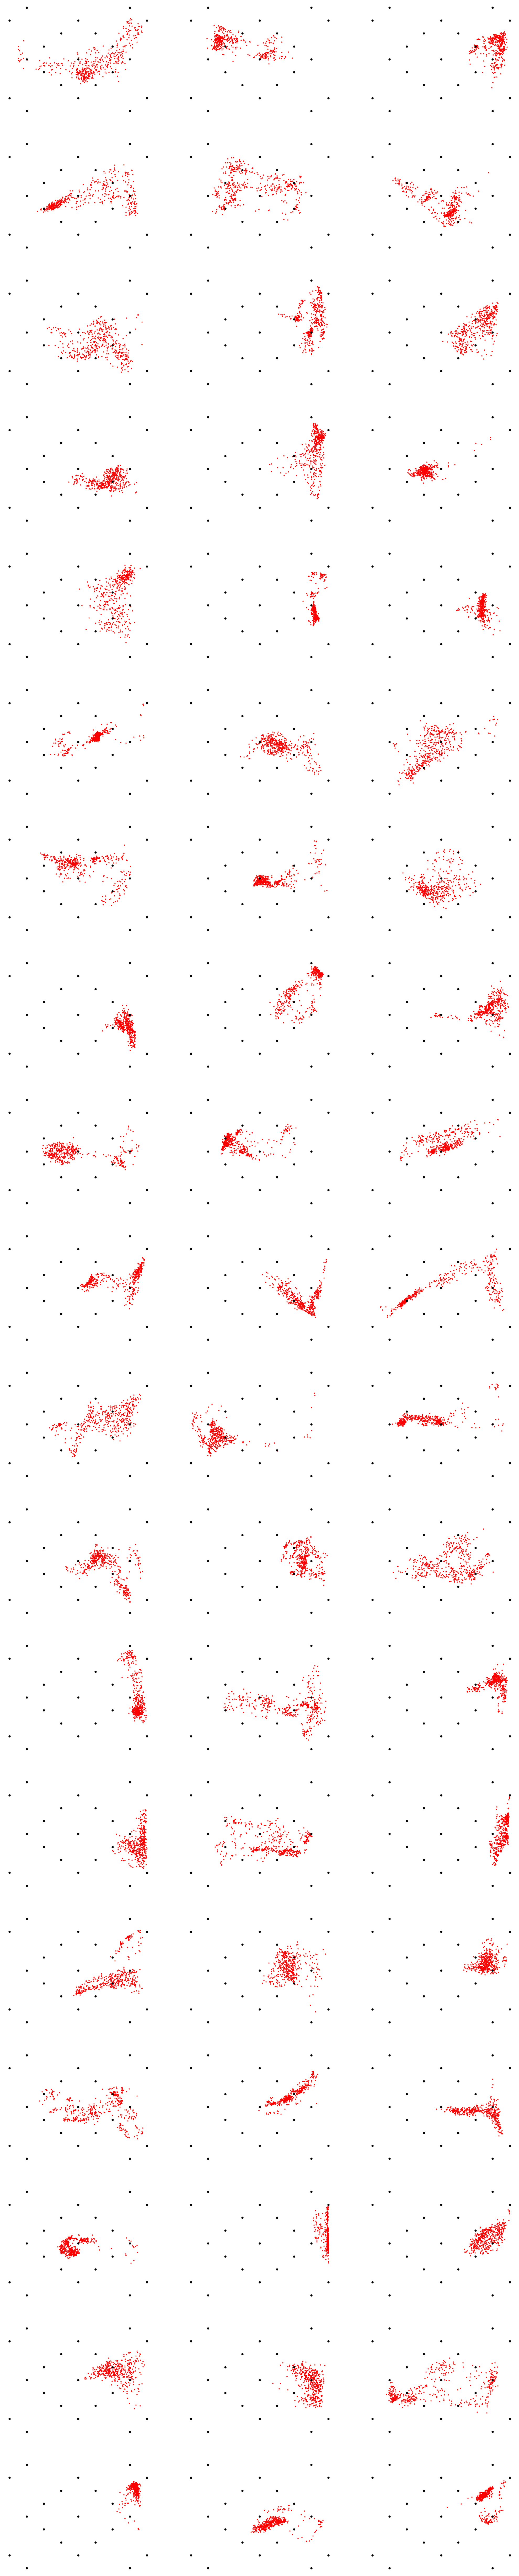

In [10]:
# Prediction of image 1 for all the 57 participants whose target value is not known

loaded_model = load('model_filename.joblib')

target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]
image = cv2.imread('points.jpg')
image_height, image_width, _ = image.shape
scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]


# plt.style.use("tableau-colorblind10")
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.style.use("seaborn-white")
fig, axes = plt.subplots(nrows=19, ncols=3, figsize=(20, 100))  # Create a grid of subplots

for i in range(57):
    unknown_data = pd.read_csv('./participants_57/unknown_data{}_0.csv'.format(i)) #1st image without target

    unknown_test_list = []
    for j in range(len(unknown_data)):
        temp = ast.literal_eval(unknown_data.loc[j][0])
        unknown_test_list.append(temp)
    y_pred = loaded_model.predict(unknown_test_list)

    row = i // 3
    col = i % 3
    scaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]
    # Plot the points on the corresponding subplot
    for point in scaled_predicted_points:
        axes[row, col].scatter(point[0], point[1], color="red", s=5, marker='o')  # Adjust marker size and color as needed
    for point in scaled_targets:
        axes[row, col].scatter(point[0], point[1], color='black', s=25, marker='o')  # Adjust marker size and color as needed

    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])


# plt.tight_layout()  
plt.grid(False)
plt.show()



/tmp/ipykernel_1313/1149891640.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


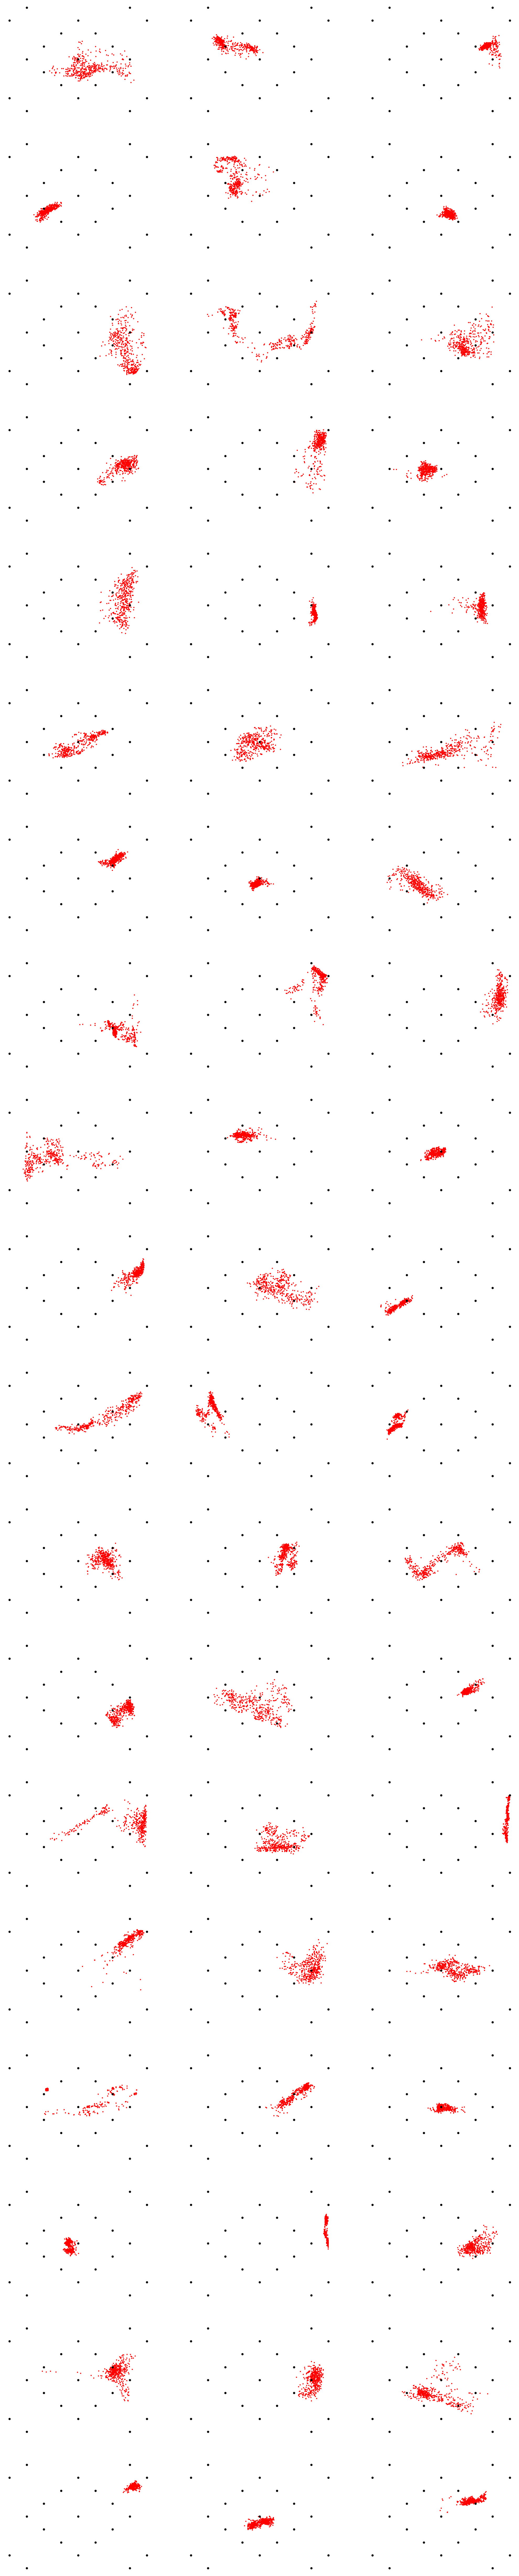

In [11]:
# Prediction of image 2 for all the 57 participants whose target value is not known

loaded_model = load('model_filename.joblib')

target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]
image = cv2.imread('points.jpg')
image_height, image_width, _ = image.shape
scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]


# plt.style.use("tableau-colorblind10")
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.style.use("seaborn-white")
fig, axes = plt.subplots(nrows=19, ncols=3, figsize=(20, 100))  # Create a grid of subplots

for i in range(57):
    unknown_data = pd.read_csv('./participants_57/unknown_data{}_1.csv'.format(i)) #2nd image without target

    unknown_test_list = []
    for j in range(len(unknown_data)):
        temp = ast.literal_eval(unknown_data.loc[j][0])
        unknown_test_list.append(temp)
    y_pred = loaded_model.predict(unknown_test_list)

    row = i // 3
    col = i % 3
    scaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]
    # Plot the points on the corresponding subplot
    for point in scaled_predicted_points:
        axes[row, col].scatter(point[0], point[1], color="red", s=5, marker='o')  # Adjust marker size and color as needed
    for point in scaled_targets:
        axes[row, col].scatter(point[0], point[1], color='black', s=25, marker='o')  # Adjust marker size and color as needed

    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])


# plt.tight_layout()  
plt.grid(False)
plt.show()



# Heatmap of the prediction points

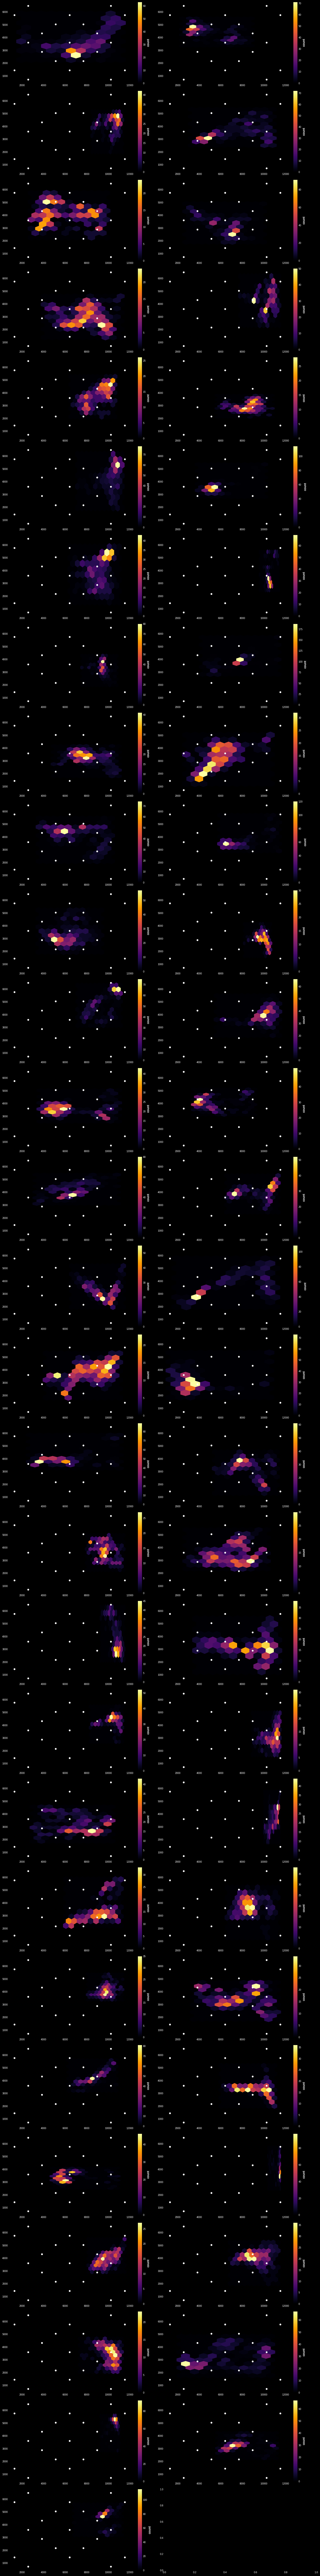

In [8]:
# Prediction of image 1 for all the 57 participants whose target value is not known
# Load the trained model
loaded_model = load('model_filename.joblib')

# Define the target points
target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]

# Load the image
image = cv2.imread('points.jpg')
image_height, image_width, _ = image.shape

# Scale the target points to image dimensions
scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]

# Plot settings
# plt.style.use("seaborn-white")
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.style.use("dark_background")

fig, axes = plt.subplots(nrows=29, ncols=2, figsize=(15, 120))  # Create a grid of subplots

for i in range(57):
    unknown_data = pd.read_csv('./participants_57/unknown_data{}_0.csv'.format(i)) #1st image without target data

    unknown_test_list = []
    for j in range(len(unknown_data)):
        temp = ast.literal_eval(unknown_data.loc[j][0])
        unknown_test_list.append(temp)
    y_pred = loaded_model.predict(unknown_test_list)

    row = i // 2
    col = i % 2
    scaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]

    # Extract x and y coordinates from scaled predicted points
    x_coord = [coord[0] for coord in scaled_predicted_points]
    y_coord = [coord[1] for coord in scaled_predicted_points]

    # Plot heatmap for the current subplot
    hb = axes[row, col].hexbin(x_coord, y_coord, gridsize=10, cmap='inferno')

    # Add a color bar
    plt.colorbar(hb, ax=axes[row, col], label='count')

    # Plot the target points
    for point in scaled_targets:
        axes[row, col].scatter(point[0], point[1], color='white', s=25, marker='o')  # Adjust marker size and color as needed

    axes[row, col].grid(False)
    # Remove ticks
    # axes[row, col].set_xticks([])
    # axes[row, col].set_yticks([])

plt.grid(False)
plt.tight_layout()
plt.show()

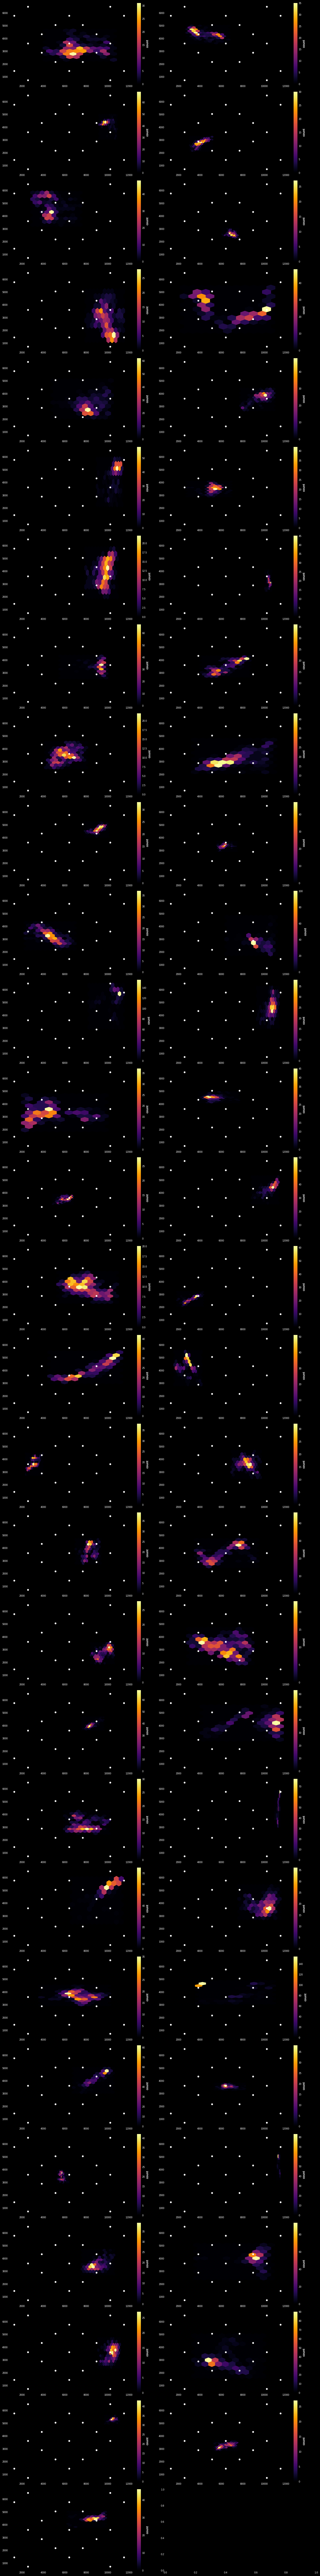

In [10]:
# Prediction of image 2 for all the 57 participants whose target value is not known

# Load the trained model
loaded_model = load('model_filename.joblib')

# Define the target points
target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]

# Load the image
image = cv2.imread('points.jpg')
image_height, image_width, _ = image.shape

# Scale the target points to image dimensions
scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]

# Plot settings
# plt.style.use("seaborn-white")
plt.style.use("dark_background")

fig, axes = plt.subplots(nrows=29, ncols=2, figsize=(15, 120))  # Create a grid of subplots

for i in range(57):
    unknown_data = pd.read_csv('./participants_57/unknown_data{}_1.csv'.format(i)) #2nd image without target

    unknown_test_list = []
    for j in range(len(unknown_data)):
        temp = ast.literal_eval(unknown_data.loc[j][0])
        unknown_test_list.append(temp)
    y_pred = loaded_model.predict(unknown_test_list)

    row = i // 2
    col = i % 2
    scaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]

    # Extract x and y coordinates from scaled predicted points
    x_coord = [coord[0] for coord in scaled_predicted_points]
    y_coord = [coord[1] for coord in scaled_predicted_points]

    # Plot heatmap for the current subplot
    hb = axes[row, col].hexbin(x_coord, y_coord, gridsize=10, cmap='inferno')

    # Add a color bar
    plt.colorbar(hb, ax=axes[row, col], label='count')

    # Plot the target points
    for point in scaled_targets:
        axes[row, col].scatter(point[0], point[1], color='white', s=25, marker='o')  # Adjust marker size and color as needed

    axes[row, col].grid(False)
    # Remove ticks
    # axes[row, col].set_xticks([])
    # axes[row, col].set_yticks([])

plt.grid(False)
plt.tight_layout()
plt.show()